In [2]:
import pygmt
import matplotlib.pyplot as plt

import xarray as xr
import pandas as pd
import numpy as np
import cmocean

In [3]:
adcp = xr.open_dataset('adcp_lta_cruise2.nc')

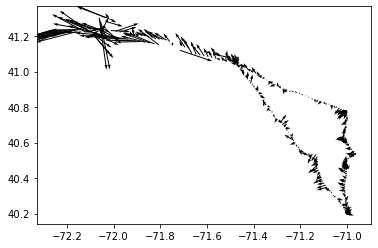

In [4]:
# We want something like this, but nicer
i1 = 0
i2 = -1
plt.quiver(adcp.lon[i1:i2],adcp.lat[i1:i2],adcp.u[i1:i2,20],adcp.v[i1:i2,20])

In [5]:
# Let's use GMT
topo_data = '@earth_relief_30s'
proj = 'M8i'
extent = [-72.55,-70.5,40.1,41.4]

In [13]:
fig = pygmt.Figure()

pygmt.makecpt(
    cmap='bathy',
    series='-200/-10/10',
    continuous=True
)

#plot high res topography
fig.grdimage(
    grid=topo_data,
    region=extent,
    projection=proj,
    shading=True,
    frame="fag"
    )

fig.grdcontour(
    grid=topo_data,
    interval=10,
    annotation="10+f6p",
    limit="-120/-10",
    pen="a0.15p",
    )

# fig.plot(
#     x=lon_ctd,
#     y=lat_ctd,
#     style='c0.25c',
#     color='mediumpurple3',
#     pen='black',
#     )

# Note: style=v requires 
#       angle and length in direction
u,v = adcp.u[i1:i2,0],adcp.v[i1:i2,0]
angle  = np.arctan2(v,u)*180/np.pi
length = np.sqrt(u**2 + v**2) 

fig.plot(
    x=adcp.lon[i1:i2],
    y=adcp.lat[i1:i2],
    style='v0.05/0.2/0.025i',  
    direction=[angle,length],
    color='red',
    )

fig.coast(
    shorelines=True,
    resolution='f',land='black')

# Legends and text
fig.plot(
    x=[-72.47],
    y=[41.33],
    style='v0.05/0.2/0.025i',  
    direction=[[0.],[1.0]],
    color='red',
    )


fig.text(
    x=[-72.43],
    y=[41.36],
    text='1.0 m/s',  
    font='9p,Helvetica-Bold,red',
    )

fig.text(
    x=[-72.425],
    y=[41.385],
    text='ADCP 5 m',  
    font='9p,Helvetica,red',
    )

fig.text(
    x=[-72.05],
    y=[41.345],
    text='Avery Point',  
    font='7p,Helvetica-Bold,white',
    angle=60,
    )

fig.text(
    x=[-71.98],
    y=[41.271],
    text="Fishers Island",  
    font='7p,Helvetica-Bold,white',
    angle=20,
    )

fig.text(
    x=[-71.58],
    y=[41.175],
    text='Block ',  
    font='7p,Helvetica-Bold,white',
    angle=0,
    )

fig.text(
    x=[-71.58],
    y=[41.1617],
    text='Island ',  
    font='7p,Helvetica-Bold,white',
    angle=0,
    )

fig.show()

fig.savefig("OceanExpedition_cruise2.pdf",dpi=150)

plot [WARNING]: Vector length = NaN near line 1. Skipped


In [14]:
!open OceanExpedition_cruise2.pdf